#### Introduction:

To determine the best neighborhood in Pittsburgh in a data-driven manner, we based our approach around the use of two metrics; the first filtered the neighborhoods to create a smaller subset, while the second was applied to the filtered group.  An average of the values from the first and second metrics was then calculated to create a final percentage; the higher the percentage, the better the neighborhood.  As such, we settled on arrest rate and education level as our two metrics because they reveal important but very different things about a neighborhood.  An alternative approach that we pursued initially but later altered was the idea of utilizing the first metric solely to filter out most of the neighborhoods and determine the best neighborhood from the remaining options strictly based on the results of the second metric.     

#### Metric:

The first metric we used is arrest rate. To measure this, we utilized a dataset of Pittsburgh Police Arrest Data entries and counted/stored the number of arrests for each neighborhood over a period of approximately three years.  The count for each neighborhood was divided by its population and then multiplied by 100000 to standardize the resulting arrest rate.  

The second metric we used was education level. An education was deemed to be sufficient when a person received a high school diploma. For this, we utilized a dataset containing educational attainment data for the population 25 years and over.  The number of people who at least completed high school and any further education was totaled for each neighborhood and divided by the given sample size in the dataset to come up with a resulting education rate. 

### Datasets

##### Total Population

##### Pittsburgh Police Arrest Data

##### Educational Attainment for the Population 25 & over 


#### The Best Neighborhood:

In [1]:
# stream data

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

arrestData = pd.read_csv("PPAD.csv")

nPopulations = pd.read_csv("totalPopulation.csv", index_col = 'Id')

eduA = pd.read_csv("eduAttainment.csv")


eduA.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,Allegheny Center,1,1002,139.000000,10,14.000000,0,10.000000,0,10.000000,...,87,52.000000,274,77.000000,80,46.000000,125,66.000000,8,11.000000
1,Allegheny West,2,293,72.000000,0,10.000000,0,10.000000,0,10.000000,...,16,10.000000,88,34.000000,33,29.000000,27,31.000000,20,26.000000
2,Allentown,3,1577,227.187148,19,27.000000,0,17.320508,0,17.320508,...,54,34.871192,70,42.626283,35,29.529646,22,29.597297,0,17.320508
3,Arlington,4,1296,218.515446,31,32.878564,0,17.320508,0,17.320508,...,147,59.405387,94,43.127717,25,22.158520,4,15.779734,0,17.320508
4,Arlington Heights,5,121,63.000000,0,10.000000,0,10.000000,0,10.000000,...,0,10.000000,0,10.000000,0,10.000000,0,10.000000,0,10.000000
5,Banksville,6,3244,480.985447,5,20.518285,0,20.000000,0,20.000000,...,333,137.793324,606,163.874952,581,209.348991,75,59.539903,0,20.000000
6,Bedford Dwellings,7,740,96.000000,15,10.000000,0,10.000000,0,10.000000,...,47,22.000000,26,23.000000,0,10.000000,0,10.000000,0,10.000000
7,Beechview,8,5905,522.106311,123,99.924972,0,31.622777,0,31.622777,...,633,147.621137,1105,222.198110,325,107.009345,87,57.818682,20,42.154478
8,Beltzhoover,9,1173,230.724944,0,20.000000,0,20.000000,0,20.000000,...,46,55.901699,64,41.291646,72,45.563143,0,20.000000,0,20.000000
9,Bloomfield,10,6612,403.312534,59,36.331804,0,31.622777,0,31.622777,...,408,106.714573,1801,235.274308,1112,173.280120,310,84.172442,216,74.182208


In [4]:
# create dict of neighborhoods w default vals
nc = {}

for i in range(1, len(nPopulations)):
    nValue = nPopulations.loc[i, "Neighborhood"]
    if(nValue not in nc):
        nc[nValue] = 0
nc  

{'Allegheny Center': 0,
 'Allegheny West': 0,
 'Allentown': 0,
 'Arlington': 0,
 'Arlington Heights': 0,
 'Banksville': 0,
 'Bedford Dwellings': 0,
 'Beechview': 0,
 'Beltzhoover': 0,
 'Bloomfield': 0,
 'Bluff': 0,
 'Bon Air': 0,
 'Brighton Heights': 0,
 'Brookline': 0,
 'California-Kirkbride': 0,
 'Carrick': 0,
 'Central Business District': 0,
 'Central Lawrenceville': 0,
 'Central Northside': 0,
 'Central Oakland': 0,
 'Chartiers City': 0,
 'Chateau': 0,
 'Crafton Heights': 0,
 'Crawford-Roberts': 0,
 'Duquesne Heights': 0,
 'East Allegheny': 0,
 'East Carnegie': 0,
 'East Hills': 0,
 'East Liberty': 0,
 'Elliott': 0,
 'Esplen': 0,
 'Fairywood': 0,
 'Fineview': 0,
 'Friendship': 0,
 'Garfield': 0,
 'Glen Hazel': 0,
 'Greenfield': 0,
 'Hays': 0,
 'Hazelwood': 0,
 'Highland Park': 0,
 'Homewood North': 0,
 'Homewood South': 0,
 'Homewood West': 0,
 'Knoxville': 0,
 'Larimer': 0,
 'Lincoln Place': 0,
 'Lincoln-Lemington-Belmar': 0,
 'Lower Lawrenceville': 0,
 'Manchester': 0,
 'Marshall

In [5]:
# create dict of neighborhoods : populations

numOfNeighborhoods = 0

for i in range(len(nPopulations)):
    numOfNeighborhoods += 1

pop = {}

for i in range(1, len(nPopulations)):
    val = nPopulations.loc[i, "Neighborhood"]
    if(val in nPopulations.values):
        pop[val] = nPopulations.get_value(nPopulations.loc[nPopulations['Neighborhood'] == val].index[0], 'Estimate; Total')

pop

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


{'Allegheny Center': 1411,
 'Allegheny West': 343,
 'Allentown': 2558,
 'Arlington': 1852,
 'Arlington Heights': 272,
 'Banksville': 3858,
 'Bedford Dwellings': 1349,
 'Beechview': 8078,
 'Beltzhoover': 1702,
 'Bloomfield': 8669,
 'Bluff': 6294,
 'Bon Air': 920,
 'Brighton Heights': 7421,
 'Brookline': 13160,
 'California-Kirkbride': 803,
 'Carrick': 10122,
 'Central Business District': 4060,
 'Central Lawrenceville': 4775,
 'Central Northside': 2892,
 'Central Oakland': 5822,
 'Chartiers City': 560,
 'Chateau': 3,
 'Crafton Heights': 3964,
 'Crawford-Roberts': 2225,
 'Duquesne Heights': 2522,
 'East Allegheny': 2095,
 'East Carnegie': 610,
 'East Hills': 2859,
 'East Liberty': 5537,
 'Elliott': 2491,
 'Esplen': 309,
 'Fairywood': 1181,
 'Fineview': 1270,
 'Friendship': 1840,
 'Garfield': 3966,
 'Glen Hazel': 716,
 'Greenfield': 7690,
 'Hays': 405,
 'Hazelwood': 4257,
 'Highland Park': 6810,
 'Homewood North': 3371,
 'Homewood South': 2276,
 'Homewood West': 850,
 'Knoxville': 4255,
 '

In [6]:
# create dict of neighborhoods : arrests

for i in range(len(arrestData)):
    nValue = arrestData.loc[i, "INCIDENTNEIGHBORHOOD"]
    if(nValue in nc):
        nc[nValue] += 1
nc   

{'Allegheny Center': 651,
 'Allegheny West': 75,
 'Allentown': 539,
 'Arlington': 168,
 'Arlington Heights': 100,
 'Banksville': 141,
 'Bedford Dwellings': 336,
 'Beechview': 686,
 'Beltzhoover': 313,
 'Bloomfield': 551,
 'Bluff': 783,
 'Bon Air': 125,
 'Brighton Heights': 612,
 'Brookline': 693,
 'California-Kirkbride': 152,
 'Carrick': 1313,
 'Central Business District': 2131,
 'Central Lawrenceville': 272,
 'Central Northside': 23,
 'Central Oakland': 304,
 'Chartiers City': 23,
 'Chateau': 262,
 'Crafton Heights': 293,
 'Crawford-Roberts': 470,
 'Duquesne Heights': 103,
 'East Allegheny': 1235,
 'East Carnegie': 27,
 'East Hills': 580,
 'East Liberty': 995,
 'Elliott': 349,
 'Esplen': 105,
 'Fairywood': 62,
 'Fineview': 496,
 'Friendship': 107,
 'Garfield': 396,
 'Glen Hazel': 69,
 'Greenfield': 279,
 'Hays': 62,
 'Hazelwood': 706,
 'Highland Park': 286,
 'Homewood North': 1036,
 'Homewood South': 1138,
 'Homewood West': 417,
 'Knoxville': 752,
 'Larimer': 452,
 'Lincoln Place': 10

In [7]:
# create dict of neighborhoods : arrest rates (per 100k)

for key, value in nc.items():
    nc[key] = (value / pop[key]) * 100000
nc

{'Allegheny Center': 46137.49114103473,
 'Allegheny West': 21865.889212827988,
 'Allentown': 21071.149335418297,
 'Arlington': 9071.274298056156,
 'Arlington Heights': 36764.705882352944,
 'Banksville': 3654.743390357698,
 'Bedford Dwellings': 24907.33876945886,
 'Beechview': 8492.201039861353,
 'Beltzhoover': 18390.129259694477,
 'Bloomfield': 6355.98108201638,
 'Bluff': 12440.419447092469,
 'Bon Air': 13586.95652173913,
 'Brighton Heights': 8246.86699905673,
 'Brookline': 5265.95744680851,
 'California-Kirkbride': 18929.016189290163,
 'Carrick': 12971.744714483304,
 'Central Business District': 52487.68472906404,
 'Central Lawrenceville': 5696.335078534032,
 'Central Northside': 795.2973720608575,
 'Central Oakland': 5221.573342493988,
 'Chartiers City': 4107.142857142857,
 'Chateau': 8733333.333333332,
 'Crafton Heights': 7391.523713420787,
 'Crawford-Roberts': 21123.595505617977,
 'Duquesne Heights': 4084.06026962728,
 'East Allegheny': 58949.880668257756,
 'East Carnegie': 4426.22

In [8]:
# eliminate neighborhoods above national arrest rate

ncUpdated = {}

NATL_ARREST_RATE = 3152.6

for key, value in nc.items():
    if(value <= NATL_ARREST_RATE):
        ncUpdated[key] = value
ncUpdated

{'Central Northside': 795.2973720608575,
 'Lincoln Place': 2886.539011146042,
 'Mount Oliver Borough': 353.045013239188,
 'New Homestead': 2261.0483042137716,
 'North Oakland': 2322.4328264944807,
 'Regent Square': 1839.3030009680542,
 'Squirrel Hill North': 1332.0395201129147,
 'Squirrel Hill South': 2736.566512903628,
 'Stanton Heights': 2415.458937198068,
 'Swisshelm Park': 1486.988847583643}

In [9]:
# create list arrest rate percents

arrestRatePercents = []
for value in ncUpdated.values():
    arrestRatePercents.append(((100000 - value) / 100000))
arrestRatePercents

[0.9920470262793915,
 0.9711346098885396,
 0.9964695498676082,
 0.9773895169578622,
 0.9767756717350552,
 0.9816069699903195,
 0.9866796047988708,
 0.9726343348709636,
 0.9758454106280193,
 0.9851301115241635]

In [10]:
# create dict of all neighborhoods : education levels
# sufficient education defined as completion of HS or greater

allEduLevels = {}

for i in range(len(eduA)):
    totalVal = eduA.loc[i, "Estimate; Total:"]
    hsGradNum = eduA.loc[i, "Estimate; Total: - Regular high school diploma"]
    collegeUnderOne = eduA.loc[i, "Estimate; Total: - Some college, less than 1 year"]
    collegeOnePlus = eduA.loc[i, "Estimate; Total: - Some college, 1 or more years, no degree"]
    associates = eduA.loc[i, "Estimate; Total: - Associate's degree"]
    bachelors = eduA.loc[i, "Estimate; Total: - Bachelor's degree"]
    masters = eduA.loc[i, "Estimate; Total: - Master's degree"]
    professional = eduA.loc[i, "Estimate; Total: - Professional school degree"]
    doctorate = eduA.loc[i, "Estimate; Total: - Doctorate degree"]
    totalEdu = hsGradNum + collegeUnderOne + collegeOnePlus + associates + bachelors + masters + professional + doctorate
    neigh = eduA.loc[i, "Neighborhood"]
    if(neigh not in allEduLevels):
        allEduLevels[neigh] = totalEdu / totalVal

allEduLevels

{'Allegheny Center': 0.9111776447105788,
 'Allegheny West': 0.89419795221843,
 'Allentown': 0.771718452758402,
 'Arlington': 0.7955246913580247,
 'Arlington Heights': 0.4793388429752066,
 'Banksville': 0.9001233045622689,
 'Bedford Dwellings': 0.6851351351351351,
 'Beechview': 0.8426756985605419,
 'Beltzhoover': 0.7536231884057971,
 'Bloomfield': 0.9233212341197822,
 'Bluff': 0.5867158671586716,
 'Bon Air': 0.8640132669983416,
 'Brighton Heights': 0.8768573551263001,
 'Brookline': 0.8552031509121062,
 'California-Kirkbride': 0.7715430861723447,
 'Carrick': 0.7929671527872427,
 'Central Business District': 0.9359861591695502,
 'Central Lawrenceville': 0.8611812216052499,
 'Central Northside': 0.8506111362607515,
 'Central Oakland': 0.832810867293626,
 'Chartiers City': 0.7923250564334086,
 'Chateau': 1.0,
 'Crafton Heights': 0.8654587509637626,
 'Crawford-Roberts': 0.7656957928802589,
 'Duquesne Heights': 0.8908554572271387,
 'East Allegheny': 0.7853577371048253,
 'East Carnegie': 0.843

In [11]:
# create dict of select neighborhoods :  education level

selectEduLevels = {}

for key in ncUpdated.keys():
    if(key not in selectEduLevels):
        selectEduLevels[key] = allEduLevels[key]

selectEduLevels

{'Central Northside': 0.8506111362607515,
 'Lincoln Place': 0.8523464326592903,
 'Mount Oliver Borough': 0.7085137085137085,
 'New Homestead': 0.8847795163584637,
 'North Oakland': 0.9298245614035088,
 'Regent Square': 0.9874686716791979,
 'Squirrel Hill North': 0.9797030633339597,
 'Squirrel Hill South': 0.9524178950090509,
 'Stanton Heights': 0.90607424071991,
 'Swisshelm Park': 0.873405299313052}

In [12]:
# create dict with average percents of final neighborhoods (higher is better)

fDict = {}

for key, value in selectEduLevels.items():
    for i in range(len(selectEduLevels)):
        if(key not in fDict):
            fDict[key] = ((arrestRatePercents[i] + value) / 2) * 100
fDict

{'Central Northside': 92.13290812700714,
 'Lincoln Place': 92.2196729469341,
 'Mount Oliver Borough': 85.028036739655,
 'New Homestead': 93.84132713189275,
 'North Oakland': 96.09357938414502,
 'Regent Square': 98.97578489792946,
 'Squirrel Hill North': 98.58750448066755,
 'Squirrel Hill South': 97.22324606442211,
 'Stanton Heights': 94.90606334996508,
 'Swisshelm Park': 93.27261627962218}

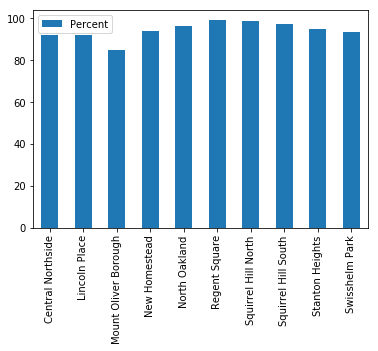

In [13]:
# graph of percentages

finalDict = pd.DataFrame.from_dict(fDict, orient = 'index', columns = ['Percent'])

finalDict.plot(kind = 'bar', rot = 90)


In [14]:
# find neighborhood with highest percentage

maxVal = max(selectEduLevels.values())

for key, value in selectEduLevels.items():
    if(value == maxVal):
        print("The best neighborhood in Pittsburgh is: " + key)

The best neighborhood in Pittsburgh is: Regent Square


#### Conclusion

Prateek:  While I personally have never been to Regent Square, I have been to both parts of Squirrel Hill and came away with the impression that it looks to be a safe and comfortable place that I would not mind living in. Thus, considering that Squirrel Hill was very close to having the highest percentage and the good things I've heard from others who have been to Regent Square, I believe that Regent Square being best neighborhood and the two parts of Squirrel Hill rounding out the top three proves that our data-driven argument is sound.  


Luke:

Noah:

Rachel: 